### 커피숍 영업 현황

#### 필요한 패키지들을 불러온다.

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

#### 1). 데이터를 불러온다.

In [4]:
df = pd.read_csv('/content/drive/MyDrive/K-DIGITAL/dataset/data_coffee.csv',encoding = 'ms949')

In [5]:
df.shape

(46832, 23)

In [6]:
df.head(5)

,number,companyName,adress,adressBystreet,dateOflicensing,stateOfbusiness,dateOfclosure,startdateOfcessation,duedateOfcessation,dateOfreOpen,areaOfsite,zip,waterwork,numOfmenWorker,yearOfStart,multipleUse,grade,sizeOfsite,numOfwomenWorker,vicintyOfsite,sanitaryName,businessCondition,totalOfworker
0,1,#11(Sharp eleven),서울특별시 양천구 목동 956번지 롯데캐슬위너 상가동 107호(한두3길 44),"서울특별시 양천구 목동중앙북로 38 (목동,롯데캐슬위너 상가동 107호(한두3길 44))",20080917,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2008.0,N,NaN,20.80,NaN,NaN,휴게음식점,커피숍,NaN
1,2,( 주)커피빈코리아청주지웰시티점,"충청북도 청주시 흥덕구 복대동 3379번지 신영지웰시티1차상업시설 124-1, 12...","충청북도 청주시 흥덕구 대농로 17 (복대동,신영지웰시티1차상업시설 124-1, 1...",20101124,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2010.0,N,NaN,212.72,NaN,NaN,휴게음식점,커피숍,NaN
2,3,(aA)더블에이,경상북도 경산시 사동 39번지 108-2호,"경상북도 경산시 백자로10길 3-11, 108-2호 (사동)",20130902,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2013.0,N,NaN,20.04,NaN,아파트지역,휴게음식점,커피숍,NaN
3,4,(강서)카페치따,서울특별시 강서구 등촌동 63-12번지 외 2필지 어위쉬예다인 (지상 1층) 104호,"서울특별시 강서구 양천로 452, 1층 104호 (등촌동, 3동 어위쉬예다인)",20121108,운영중,NaN,NaN,NaN,NaN,NaN,NaN,상수도전용,NaN,2012.0,N,NaN,64.17,NaN,NaN,휴게음식점,커피숍,NaN
4,5,(로즈버드)명동아바타,서울특별시 중구 명동2가 83-5번지 (아바타1층1218),NaN,20020911,폐업 등,20071105.0,NaN,NaN,NaN,NaN,NaN,상수도전용,0.0,2002.0,N,NaN,11.40,0.0,NaN,휴게음식점,커피숍,0.0


현재 운영중인 커피숍:

In [7]:
df2 = df.loc[df.stateOfbusiness=='운영중',:]
df2.shape

(33587, 23)

현재 폐업 상태의 커피숍:

In [8]:
df3 = df.loc[df.stateOfbusiness=='폐업 등',:]
df3.shape

(13245, 23)

#### 2). 1997~2014년도 사이의 개업 횟수를 (yearOfStart) 도수분포표로 요약하고 시각화 하시오.

In [9]:
sr = df.yearOfStart.value_counts()
sr = sr.sort_index()
sr = sr[(1997 <= sr.index) & (sr.index <= 2014)]                          # 1997 ~ 2014
sr

1997.0      54
1998.0      54
1999.0      46
2000.0      89
2001.0     183
2002.0     398
2003.0     799
2004.0     648
2005.0     654
2006.0     863
2007.0    1233
2008.0    1579
2009.0    2489
2010.0    4172
2011.0    5942
2012.0    6315
2013.0    7270
2014.0    9905
Name: yearOfStart, dtype: int64

(1997.0, 2014.0)

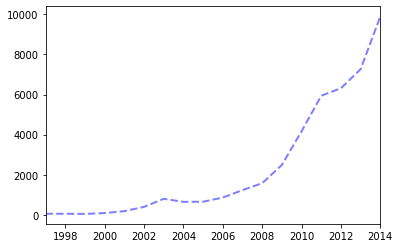

In [10]:
plt.plot(sr.index, sr.values, color='blue', alpha=0.5, linewidth=2, linestyle='--')
plt.xlim([1997, 2014])

(1997.0, 2014.0)

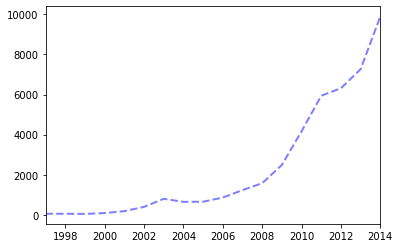

In [11]:
# 다음 방식도 가능함.
sr.plot.line( color='blue', alpha=0.5, linewidth=2, linestyle='--')
plt.xlim([1997, 2014])

#### 3). 운영중인 커피숍 대상으로 1997~2014년도 사이의 개업 회수를 도수분포표로 요약하시오. 

In [12]:
srOpen = df2.yearOfStart.value_counts()
srOpen = srOpen.sort_index()
srOpen = srOpen[(1997 <= srOpen.index) & (srOpen.index <= 2014)]                          # 1997 ~ 2014
#srOpen

#### 4). 폐업상태 커피숍 대상으로 1997~2014년도 사이의 개업 회수를 도수분포표로 요약하시오. 

In [13]:
srClose = df3.yearOfStart.value_counts()
srClose = srClose.sort_index()
srClose = srClose[(1997 <= srClose.index) & (srClose.index <= 2014)]                          # 1997 ~ 2014
#srClose

#### 5). 위 #3과 #4 결과를 하나의 그래프로 시각화한다. 범례도 포함한다. 

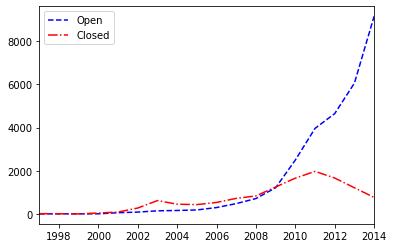

In [14]:
# 다른 방식.
plt.plot(srOpen.index, srOpen.values, color = 'blue', linestyle='--',label='Open')
plt.plot(srClose.index, srClose.values,color = 'red', linestyle='-.', label='Closed')
plt.legend(loc=0)
plt.xlim([1997, 2014])
plt.show()

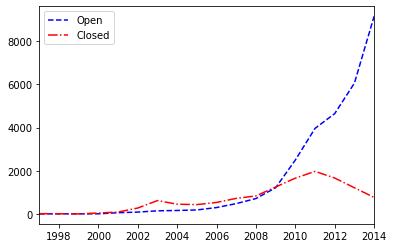

In [15]:
# 또 다른 방식 1.
srOpen.plot.line(color = 'blue', linestyle='--',label='Open')
srClose.plot.line(color = 'red', linestyle='-.', label='Closed')
plt.legend(loc=0)
plt.xlim([1997, 2014])
plt.show()

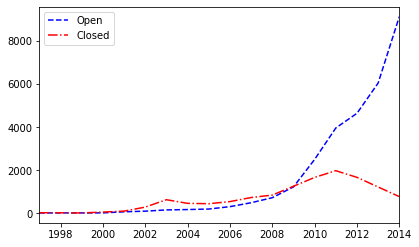

In [16]:
# 또 다른 방식 2.
fig = plt.figure(figsize=[5,3])
my_axes = fig.add_axes([0,0,1,1])
my_axes.plot(srOpen.index, srOpen.values, color = 'blue', linestyle='--',label='Open')
my_axes.plot(srClose.index, srClose.values,color = 'red', linestyle='-.', label='Closed')
my_axes.legend(loc=0)
my_axes.set_xlim([1997, 2014])
plt.show()

#### 6). groupby 메서드 사용하는 방식:

In [17]:
my_groups = df.groupby('stateOfbusiness')
my_series = []
my_names = []
for name, dfb in my_groups:
    sr = dfb.yearOfStart.value_counts()
    sr = sr.sort_index()
    sr = sr[(1997 <= sr.index) & (sr.index <= 2014)]
    my_series += [sr]
    my_names += [name]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_

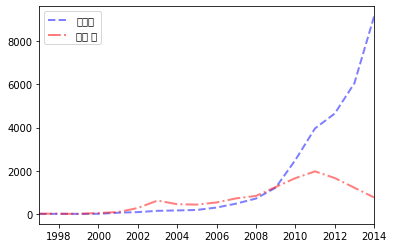

In [18]:
my_colors = ['blue', 'red','green']
my_linestyles = ['--', '-.',':']
i=0
for name, sr in zip(my_names, my_series):
    sr.plot.line(color = my_colors[i], linewidth=2, linestyle = my_linestyles[i], alpha=0.5, label=name)
    i += 1
plt.legend(loc=0)
plt.xlim([1997, 2014])
plt.show()